In [44]:
import color_extraction as ce
import matplotlib.image as mpimg

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image

In [45]:
images = "../datasets/raw/images/2005891"

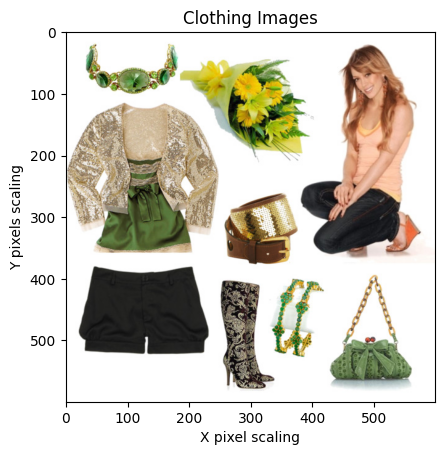

In [125]:
plt.title("Clothing Images")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
for image in range(10):
    image_path = images + "/" + str(image) + ".jpg"
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.show()
    break

In [53]:
#color_codes = get_color_codes(detected_colors[0::10]) # list splice
#color_codes = get_color_codes(detected_colors) # list splice

# PIP Package

In [57]:
with plt.cbook.get_sample_data('/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/2005891/8.jpg') as image_file:
    img = plt.imread(image_file)

In [62]:
dict_bool_arrays = ce.get_bool_arrays(img)

for color in dict_bool_arrays.keys():
    plt.imsave(image_path + color + "2.png", dict_bool_arrays[color], cmap='gray')

# Pylette

https://github.com/qTipTip/Pylette

In [126]:
import Pylette as pl

In [127]:
image_path_white_dress = "/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/5845703/2.png"
image_path_white_dress_png = "/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/5845703/2.png"
impage_path_green_glitzer = "/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/2005891/8.jpg"
impage_path_green_glitzer_png = "/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/2005891/8.png"

palette = pl.extract_colors(image=image_path_white_dress, palette_size=5, resize=False)
palette = pl.extract_colors(image=image_path_white_dress, palette_size=5, resize=False)

In [123]:
color = palette[0]

print(color.rgb)
#print(color.hls)
#print(color.hsv)
palette.display(save_to_file=False)

print(color.rgb)
#print(color.hls)
#print(color.hsv)
#palette.display(save_to_file=False)
palette.to_csv(filename='color_palette.csv', frequency=True)

(1, 1, 1)
(1, 1, 1)
1,1,1
241,236,233
225,221,218
202,198,195
105,104,102


# Colorgram.py

https://github.com/obskyr/colorgram.py

In [124]:
import colorgram

# Extract 6 colors from an image.
colors = colorgram.extract(image_path_white_dress_png, 5)

# colorgram.extract returns Color objects, which let you access
# RGB, HSL, and what proportion of the image was that color.
first_color = colors[2]
rgb = first_color.rgb # e.g. (255, 151, 210)
hsl = first_color.hsl # e.g. (230, 255, 203)
proportion  = first_color.proportion # e.g. 0.34

for color in colors:
    rgb = color.rgb
    proportion = color.proportion
    print(f'RGB: {rgb}, Proportion: {proportion}')



RGB: Rgb(r=230, g=226, b=222), Proportion: 0.5373436181997419
RGB: Rgb(r=1, g=1, b=1), Proportion: 0.4339868085409108
RGB: Rgb(r=176, g=173, b=170), Proportion: 0.02062054737441182
RGB: Rgb(r=97, g=96, b=94), Proportion: 0.007093712206672968
RGB: Rgb(r=20, g=20, b=21), Proportion: 0.0009553136782625486


# Remove white Background

Remove every white pixel in the image and replace it with a transparent pixel.

In [116]:
from PIL import Image
  
def convertImage(image_path: str):
    img = Image.open(image_path)
    img = img.convert("RGBA")
  
    datas = img.getdata()
  
    newData = []
  
    for item in datas:
        if (item[0] == 255) and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
  
    img.putdata(newData)
    img.save(image_path + "5.png", "PNG")
    print("Successful")
  
#convertImage("/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/2005891/8.jpg")
convertImage("/Users/luca/Documents/HSLU/Repository/DSPRO2-outfit-recommendation/datasets/raw/images/5845703/2.jpg")

Successful


This code does only work for white pixels. However, we sometimes also have dark backgrounds which are not necessarily black.

# RemoveBG Package

https://medium.com/@CleytonBonamigo/remove-backgrounds-of-images-with-removebg-a-python-based-command-line-tool-12c520a96bd5#:~:text=RemoveBG%20is%20a%20Python%2Dbased,library%20to%20handle%20image%20processing.

In [117]:
from rembg import remove
from PIL import Image
import sys
import os

def removebg(inputPath):
    # Get the file extension
    file_extension = os.path.splitext(inputPath)[1][1:].lower()

    # Validate file type
    if file_extension not in ['jpg', 'jpeg', 'png']:
        print(f"Warning: Unsupported file type '{file_extension}'. Supported file types are: jpg, jpeg, png.")
        sys.exit(1)
    
    try:
        # Open the image and remove its background
        originalImage = Image.open(inputPath)
        imageWithoutBg = remove(originalImage)
        
        # Save the new image with a .png extension
        outputPath = os.path.splitext(inputPath)[0] + '.png'
        imageWithoutBg.save(outputPath)
        
        print("Background removed successfully.")
    except Exception as e:
        print(f"An error occurred: {e}")
        sys.exit(1)



    # Run the removebg function
removebg(image_path_white_dress)

Background removed successfully.
Background removed successfully.
